# Loan Defaulter Data Analysis and Machine Learning Modeling

## Introduction
Welcome to this notebook dedicated to the analysis and modeling of loan defaulter data. In this project, we aim to gain insights into the factors influencing loan default and build a machine learning model that can accurately predict the likelihood of loan default for future borrowers.

The ability to identify potential loan defaulters is of paramount importance for financial institutions and lenders. By analyzing historical data and leveraging machine learning techniques, we can uncover patterns, relationships, and risk factors that significantly impact loan repayment outcomes. This analysis can help lenders make informed decisions, assess creditworthiness, and manage loan portfolios effectively.

In this notebook, we will follow a step-by-step process to analyze the loan defaulter data and build a predictive model. The main objectives of our project are as follows:

1. Perform exploratory data analysis to understand the characteristics of defaulting and non-defaulting borrowers.
2. Preprocess the data, handle missing values, and prepare it for modeling.
3. Engineer relevant features that can enhance the predictive power of the dataset.
4. Select and train a machine learning model to predict loan default probabilities.
5. Evaluate the model's performance using appropriate metrics and assess its reliability.
6. Provide insights and recommendations based on the results obtained.

By the end of this notebook, we aim to have a robust machine learning model that can accurately predict loan default probabilities based on borrower characteristics and historical data.

Let's begin the loan defaulter data analysis and modeling journey!


loading in analysis library from python

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


loading in the dataset:

In [ ]:
# Creatinh a dataframe from the dataset
df = pd.read_csv("/content/drive/MyDrive/datasets/Loan Defaulter/accepted_2007_to_2018Q4.csv.gz", compression = "gzip", low_memory=False)


In [4]:
#Information about the dataframe
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260701 non-null  object 
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  float64
 3    funded_amnt                                 2260668 non-null  float64
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade                                   

In [5]:
# Size of the dataframe
df.shape

(2260701, 151)

In [7]:
# Describing the dataframe statistically
df.describe().T


,count,mean,std,min,25%,50%,75%,max
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.00,20000.0000,40000.00
funded_amnt,2260668.0,15041.664057,9188.413022,500.00,8000.00,12875.00,20000.0000,40000.00
funded_amnt_inv,2260668.0,15023.437745,9192.331679,0.00,8000.00,12800.00,20000.0000,40000.00
int_rate,2260668.0,13.092829,4.832138,5.31,9.49,12.62,15.9900,30.99
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,10917.0,11636.883942,7625.988281,55.73,5627.00,10028.39,16151.8900,40306.41
hardship_last_payment_amount,10917.0,193.994321,198.629496,0.01,44.44,133.16,284.1900,1407.86
settlement_amount,34246.0,5010.664267,3693.122590,44.21,2208.00,4146.11,6850.1725,33601.00
settlement_percentage,34246.0,47.780365,7.311822,0.20,45.00,45.00,50.0000,521.35


Checking the meaning of each column header from learning.com


In [8]:
# Read the data description from the dictionary
description_df = pd.read_excel("https://resources.lendingclub.com/LCDataDictionary.xlsx")

# Drop blank rows, strip white space, convert to Python dictionary, fix one key name
description_df.dropna(axis="index", inplace=True)
description_df["LoanStatNew"] = description_df["LoanStatNew"].str.strip()
description_df.set_index("LoanStatNew", inplace=True)
description_dict = description_df["Description"].to_dict()
description_dict["verification_status_joint"] = description_dict.pop("verified_status_joint")

# Print descriptions in the order of dataset columns
for column in df.columns:
    description = description_dict.get(column, "Description not found.")
    print(f"• {column}: {description}")

• id: A unique LC assigned ID for the loan listing.
• member_id: A unique LC assigned Id for the borrower member.
• loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
• funded_amnt: The total amount committed to that loan at that point in time.
• funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
• term: The number of payments on the loan. Values are in months and can be either 36 or 60.
• int_rate: Interest Rate on the loan
• installment: The monthly payment owed by the borrower if the loan originates.
• grade: LC assigned loan grade
• sub_grade: LC assigned loan subgrade
• emp_title: The job title supplied by the Borrower when applying for the loan.*
• emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
• home_ownership: 

In [9]:
# Droping columns that are 90% empty
cols_to_drop = df.columns[df.isnull().mean() > 0.9]

df_droped = df.drop(cols_to_drop, axis = 1)

In [10]:
# print the last 10 rows
df_droped.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,68407277,68355089,68341763,66310712,68476807,68426831,68476668,67275481,68466926,68616873
loan_amnt,3600.0,24700.0,20000.0,35000.0,10400.0,11950.0,20000.0,20000.0,10000.0,8000.0
funded_amnt,3600.0,24700.0,20000.0,35000.0,10400.0,11950.0,20000.0,20000.0,10000.0,8000.0
funded_amnt_inv,3600.0,24700.0,20000.0,35000.0,10400.0,11950.0,20000.0,20000.0,10000.0,8000.0
term,36 months,36 months,60 months,60 months,60 months,36 months,36 months,36 months,36 months,36 months
...,...,...,...,...,...,...,...,...,...,...
total_bc_limit,2400.0,79300.0,6200.0,62500.0,20300.0,9400.0,31500.0,14500.0,16400.0,17000.0
total_il_high_credit_limit,13734.0,24667.0,14877.0,18000.0,88097.0,4000.0,46452.0,36144.0,30799.0,135513.0
hardship_flag,N,N,N,N,N,N,N,N,N,N
disbursement_method,Cash,Cash,Cash,Cash,Cash,Cash,Cash,Cash,Cash,Cash


In [11]:
# getting more information after droping some columns
df_droped.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 113 columns):
 #    Column                          Non-Null Count    Dtype  
---   ------                          --------------    -----  
 0    id                              2260701 non-null  object 
 1    loan_amnt                       2260668 non-null  float64
 2    funded_amnt                     2260668 non-null  float64
 3    funded_amnt_inv                 2260668 non-null  float64
 4    term                            2260668 non-null  object 
 5    int_rate                        2260668 non-null  float64
 6    installment                     2260668 non-null  float64
 7    grade                           2260668 non-null  object 
 8    sub_grade                       2260668 non-null  object 
 9    emp_title                       2093699 non-null  object 
 10   emp_length                      2113761 non-null  object 
 11   home_ownership                  2260668 non-null

<Figure size 1200x600 with 0 Axes>

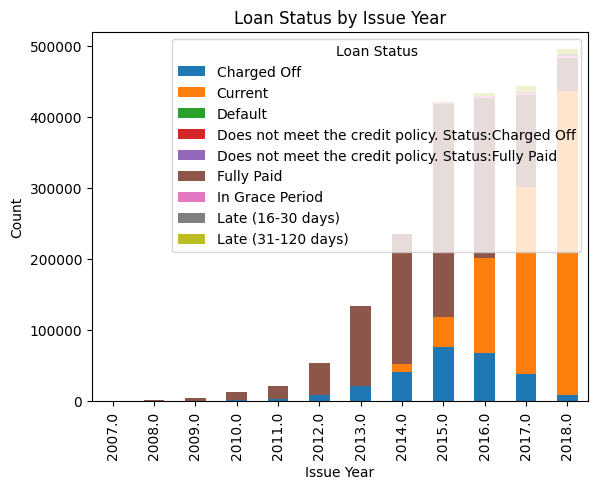

In [28]:
# Convert the 'issue_d' column to datetime type
df_droped['issue_d'] = pd.to_datetime(df_droped['issue_d'])

# Extract the year from the 'issue_d' column and create a new column 'issue_year'
df_droped['issue_year'] = df_droped['issue_d'].dt.year

# Group the DataFrame by 'issue_year' and 'loan_status', and calculate the count
grouped_df = df_droped.groupby(['issue_year', 'loan_status']).size().reset_index(name='count')

# Pivot the DataFrame to make loan_status as columns and 'count' as values
pivot_df = grouped_df.pivot(index='issue_year', columns='loan_status', values='count')

# Plot the grouped data
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.title('Loan Status by Issue Year')
plt.xlabel('Issue Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', loc='upper right')
plt.show()

### **visualizations**

since we're having a lot of features than expected in the data frame we will have to reduce and select the most important columns
* loan_amnt: The loan amount requested by the borrower.
* term: The duration of the loan (short-term or long-term).
* int_rate: The interest rate assigned to the loan.
* grade and sub_grade: These columns categorize the loan into risk grades.
* home_ownership: Indicates the type of home ownership (rent, mortgage, etc.).
* annual_inc: The borrower's annual income.
* verification_status: Indicates if the borrower's income was verified by LendingClub.
* purpose: The purpose of the loan (debt consolidation, credit card refinancing, etc.).
* dti: The borrower's debt-to-income ratio.
* loan_status: The status of the loan (fully paid, charged off, current, etc.).
* inq_last_6mths: The number of inquiries in the last 6 months.
* pub_rec: The number of public records on the borrower's credit report.
* revol_util: The borrower's revolving line utilization rate (credit card utilization).
* total_acc: The total number of credit lines in the borrower's credit file.
*  open_acc: The number of open credit lines in the borrower's credit file.
* hardship_flag: Flags whether or not the borrower is on a hardship plan
* mort_acc: The number of mortgage accounts.
* open_acc_6m: The number of open trades in the last 6 months.
* acc_now_delinq: The number of accounts on which the borrower is now delinquent.
* pub_rec_bankruptcies: Number of public record bankruptcies.
* tax_liens: Number of tax liens.

In [35]:
# List of selected columns
selected_columns = [
    'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'home_ownership',
    'annual_inc', 'verification_status', 'purpose', 'dti', 'loan_status',
    'inq_last_6mths', 'pub_rec', 'revol_util', 'total_acc', 'open_acc',
    'hardship_flag', 'mort_acc', 'open_acc_6m', 'acc_now_delinq',
    'pub_rec_bankruptcies', 'tax_liens'
]

# Create a new DataFrame with the selected columns
new_df = df_droped[selected_columns].copy()

# Display the new DataFrame
new_df.head().T

,0,1,2,3,4
loan_amnt,3600.0,24700.0,20000.0,35000.0,10400.0
term,36 months,36 months,60 months,60 months,60 months
int_rate,13.99,11.99,10.78,14.85,22.45
grade,C,C,B,C,F
sub_grade,C4,C1,B4,C5,F1
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE
annual_inc,55000.0,65000.0,63000.0,110000.0,104433.0
verification_status,Not Verified,Not Verified,Not Verified,Source Verified,Source Verified
purpose,debt_consolidation,small_business,home_improvement,debt_consolidation,major_purchase
dti,5.91,16.06,10.78,17.06,25.37


In [13]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.00,20000.00,4.000000e+04
int_rate,2260668.0,13.092829,4.832138,5.31,9.49,12.62,15.99,3.099000e+01
annual_inc,2260664.0,77992.428687,112696.199574,0.00,46000.00,65000.00,93000.00,1.100000e+08
dti,2258957.0,18.824196,14.183329,-1.00,11.89,17.84,24.49,9.990000e+02
inq_last_6mths,2260638.0,0.576835,0.885963,0.00,0.00,0.00,1.00,3.300000e+01
pub_rec,2260639.0,0.197528,0.570515,0.00,0.00,0.00,0.00,8.600000e+01
revol_util,2258866.0,50.337696,24.713073,0.00,31.50,50.30,69.40,8.923000e+02
total_acc,2260639.0,24.162552,11.987528,1.00,15.00,22.00,31.00,1.760000e+02
open_acc,2260639.0,11.612402,5.640861,0.00,8.00,11.00,14.00,1.010000e+02
mort_acc,2210638.0,1.555382,1.904981,0.00,0.00,1.00,3.00,9.400000e+01


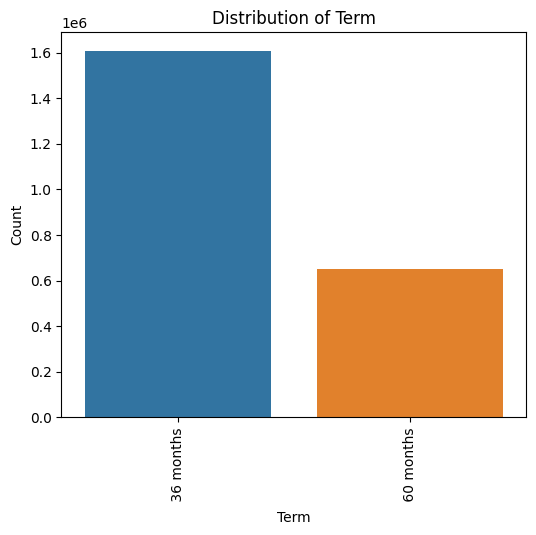

In [14]:
# Bar Plot: Distribution of Term
plt.figure(figsize=(6, 5))
sns.countplot(x='term', data=df_droped)
plt.title('Distribution of Term')
plt.ylabel('Count')
plt.xlabel('Term')
plt.xticks(rotation=90)
plt.show()


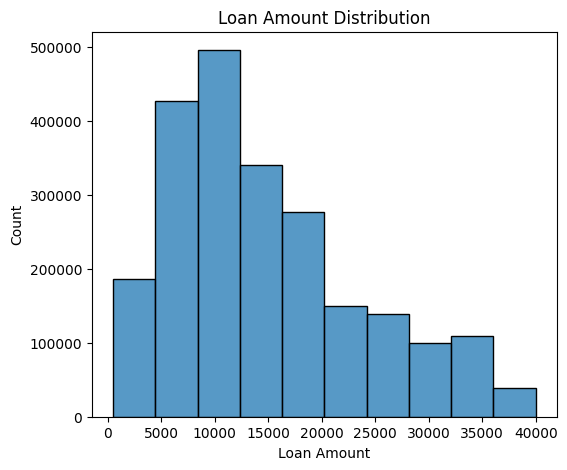

In [15]:
# Histogram: Loan Amount Distribution
plt.figure(figsize=(6, 5))
sns.histplot(data=df_droped, x='loan_amnt', bins=10)
plt.title('Loan Amount Distribution')
plt.ylabel('Count')
plt.xlabel('Loan Amount')
plt.show()


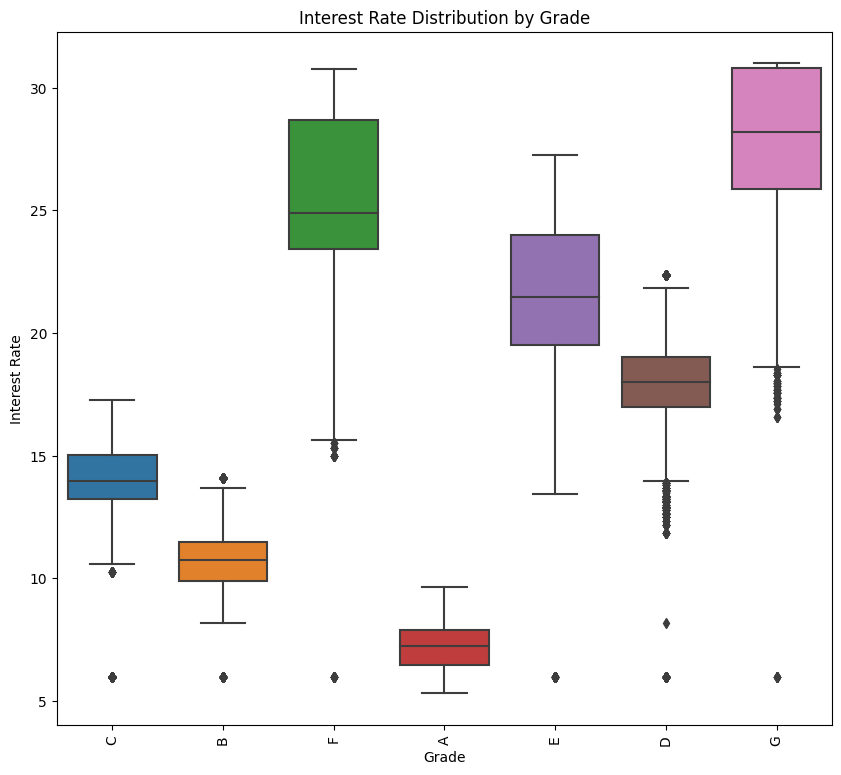

In [16]:
# Box Plot: Interest Rate Distribution by Grade
plt.figure(figsize=(10, 9))
sns.boxplot(x='grade', y='int_rate', data=df_droped)
plt.title('Interest Rate Distribution by Grade')
plt.ylabel('Interest Rate')
plt.xlabel('Grade')
plt.xticks(rotation=90)
plt.show()


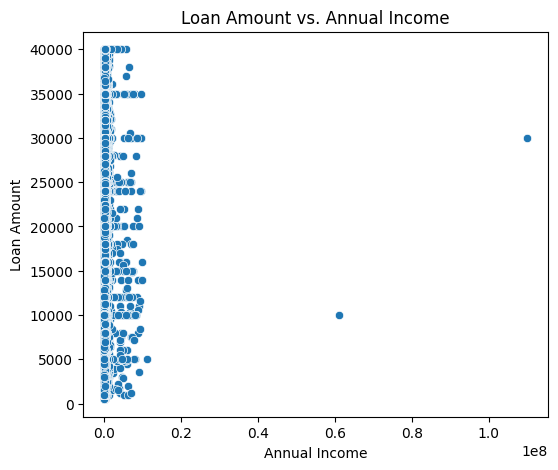

In [17]:
# Scatter Plot: Loan Amount vs. Annual Income
plt.figure(figsize=(6, 5))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=df_droped)
plt.title('Loan Amount vs. Annual Income')
plt.ylabel('Loan Amount')
plt.xlabel('Annual Income')
plt.show()

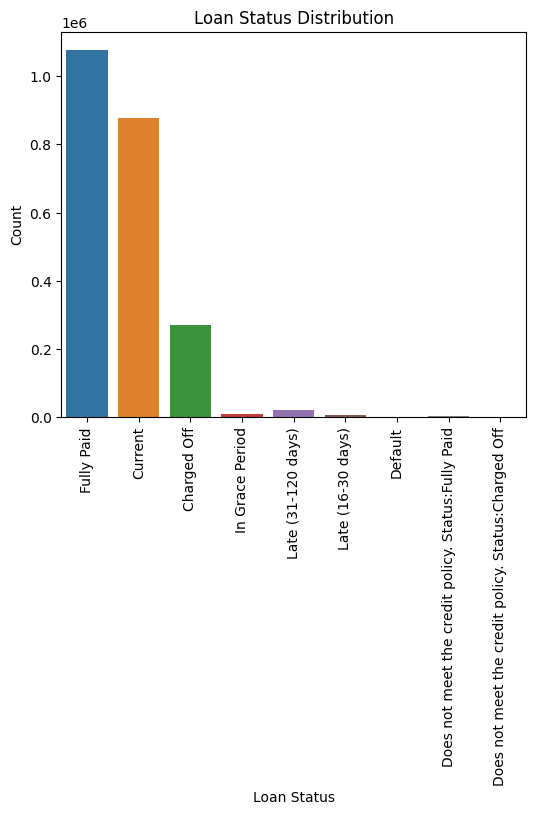

In [18]:
# Bar Plot: Loan Status
plt.figure(figsize=(6, 5))
sns.countplot(x='loan_status', data=df_droped)
plt.title('Loan Status Distribution')
plt.ylabel('Count')
plt.xlabel('Loan Status')
plt.xticks(rotation=90)
plt.show()



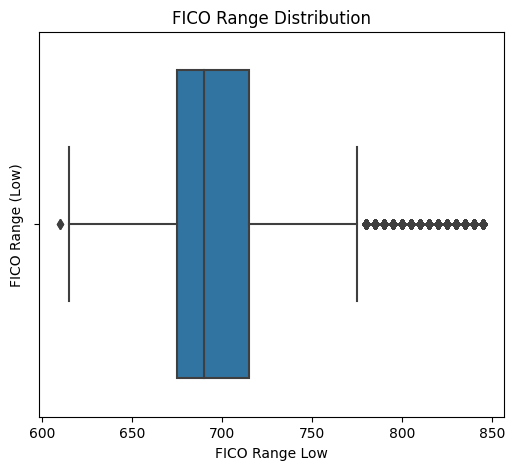

In [19]:
# Box Plot: FICO Range
plt.figure(figsize=(6, 5))
sns.boxplot(x='fico_range_low', data=df_droped)
plt.title('FICO Range Distribution')
plt.ylabel('FICO Range (Low)')
plt.xlabel('FICO Range Low')
plt.show()


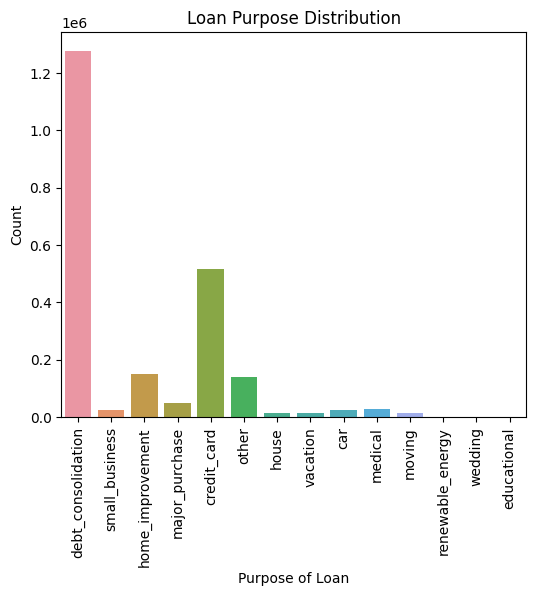

In [20]:
# Bar Plot: Purpose of Loan
plt.figure(figsize=(6, 5))
sns.countplot(x='purpose', data=df_droped)
plt.title('Loan Purpose Distribution')
plt.ylabel('Count')
plt.xlabel('Purpose of Loan')
plt.xticks(rotation=90)
plt.show()


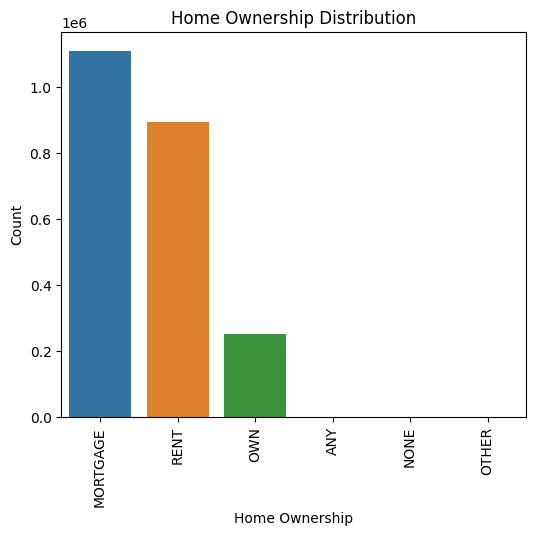

In [21]:
# Bar Plot: Home Ownership
plt.figure(figsize=(6, 5))
sns.countplot(x='home_ownership', data=df_droped)
plt.title('Home Ownership Distribution')
plt.ylabel('Count')
plt.xlabel('Home Ownership')
plt.xticks(rotation=90)
plt.show()


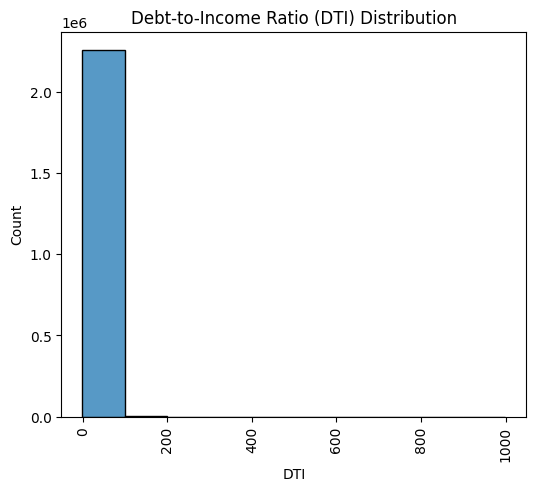

In [22]:
# Histogram: Debt-to-Income Ratio (DTI) Distribution
plt.figure(figsize=(6, 5))
sns.histplot(data=df_droped, x='dti', bins=10)
plt.title('Debt-to-Income Ratio (DTI) Distribution')
plt.ylabel('Count')
plt.xlabel('DTI')
plt.xticks(rotation=90)
plt.show()


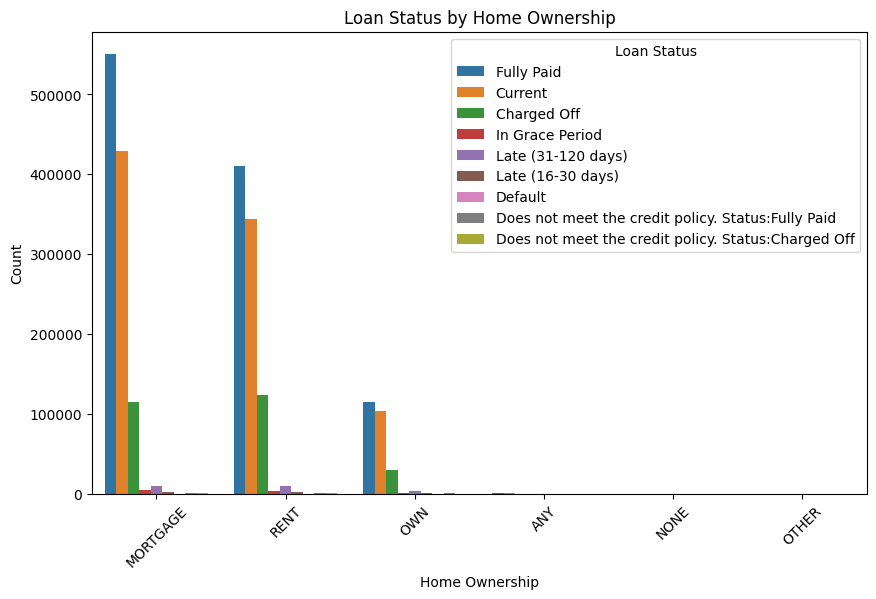

In [23]:

plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df_droped)
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', loc='upper right')
plt.show()


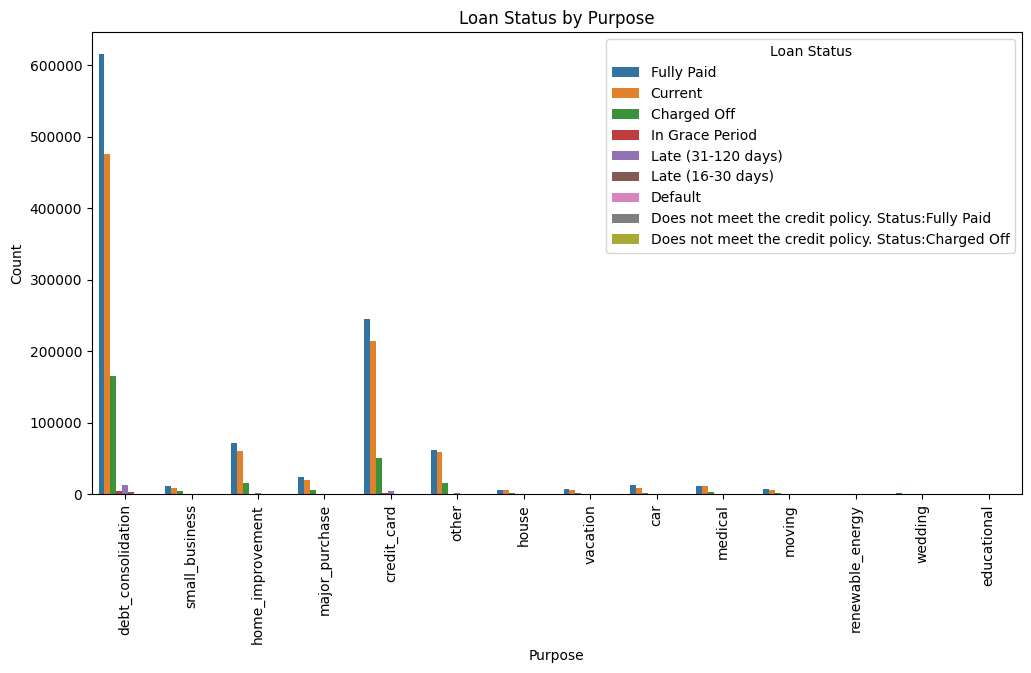

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='loan_status', data=df_droped)
plt.title('Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', loc='upper right')
plt.show()


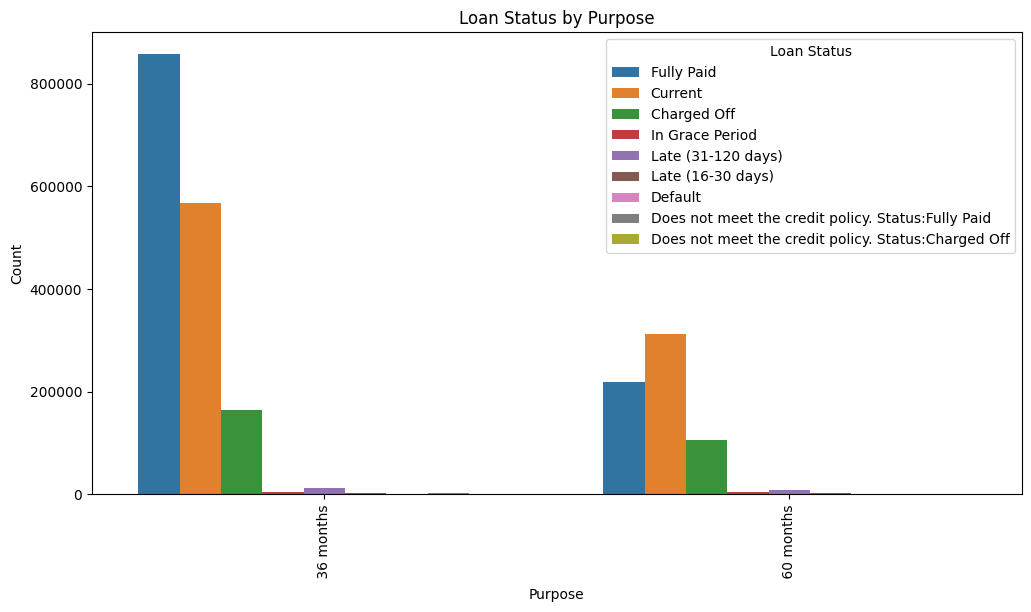

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='term', hue='loan_status', data=df_droped)
plt.title('Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', loc='upper right')
plt.show()


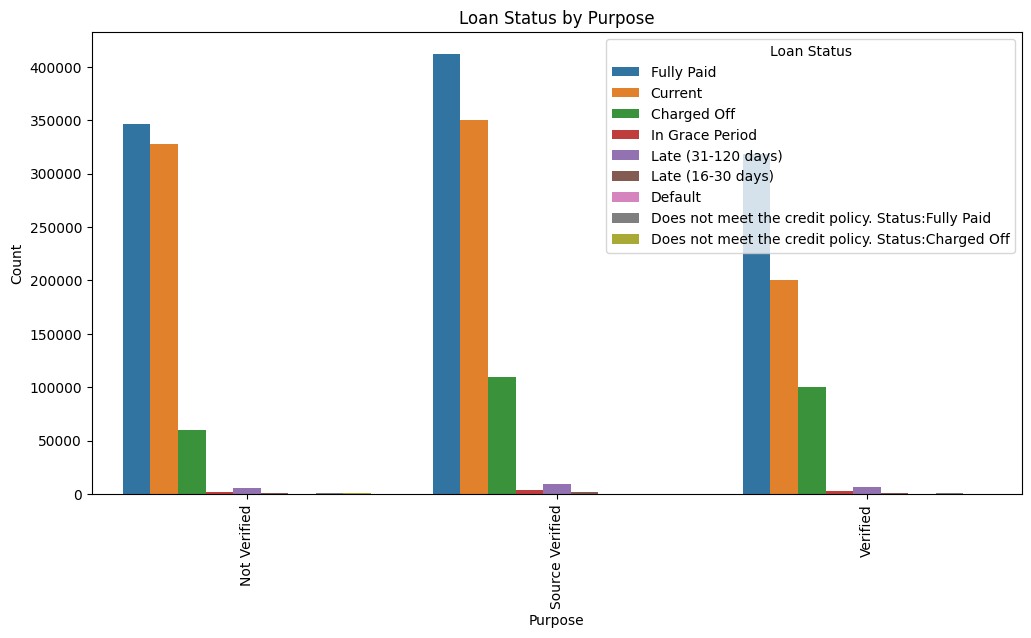

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='verification_status', hue='loan_status', data=df_droped)
plt.title('Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Loan Status', loc='upper right')
plt.show()

## **Data Cleaning**

In [29]:
new_df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             2260668 non-null  float64
 1   term                  2260668 non-null  object 
 2   int_rate              2260668 non-null  float64
 3   grade                 2260668 non-null  object 
 4   sub_grade             2260668 non-null  object 
 5   home_ownership        2260668 non-null  object 
 6   annual_inc            2260664 non-null  float64
 7   verification_status   2260668 non-null  object 
 8   purpose               2260668 non-null  object 
 9   dti                   2258957 non-null  float64
 10  loan_status           2260668 non-null  object 
 11  inq_last_6mths        2260638 non-null  float64
 12  pub_rec               2260639 non-null  float64
 13  revol_util            2258866 non-null  float64
 14  total_acc             2260639 non-

In [30]:
new_df.nunique()

loan_amnt                1572
term                        2
int_rate                  673
grade                       7
sub_grade                  35
home_ownership              6
annual_inc              89368
verification_status         3
purpose                    14
dti                     10845
loan_status                 9
inq_last_6mths             28
pub_rec                    43
revol_util               1430
total_acc                 152
open_acc                   91
hardship_flag               2
mort_acc                   47
open_acc_6m                19
acc_now_delinq              9
pub_rec_bankruptcies       12
tax_liens                  42
dtype: int64

In [31]:
new_df.isna() .any()

loan_amnt               True
term                    True
int_rate                True
grade                   True
sub_grade               True
home_ownership          True
annual_inc              True
verification_status     True
purpose                 True
dti                     True
loan_status             True
inq_last_6mths          True
pub_rec                 True
revol_util              True
total_acc               True
open_acc                True
hardship_flag           True
mort_acc                True
open_acc_6m             True
acc_now_delinq          True
pub_rec_bankruptcies    True
tax_liens               True
dtype: bool

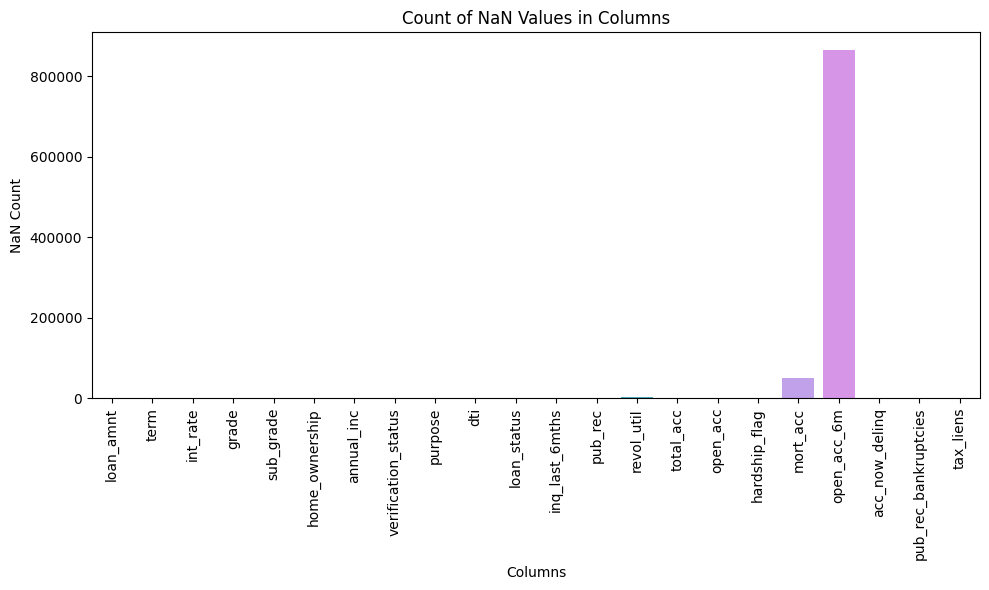

In [32]:
nan_counts = new_df.isna().sum()

# Create a bar plot of the NaN counts
plt.figure(figsize=(10, 6))
sns.barplot(x=nan_counts.index, y=nan_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.title('Count of NaN Values in Columns')
plt.tight_layout()
plt.show()

In [36]:
# removing rows with nan values using the Loan_status as a decider

column_to_drop = "loan_status"
new_df=new_df.dropna(subset=[column_to_drop])

In [37]:
new_df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
grade                        0
sub_grade                    0
home_ownership               0
annual_inc                   4
verification_status          0
purpose                      0
dti                       1711
loan_status                  0
inq_last_6mths              30
pub_rec                     29
revol_util                1802
total_acc                   29
open_acc                    29
hardship_flag                0
mort_acc                 50030
open_acc_6m             866130
acc_now_delinq              29
pub_rec_bankruptcies      1365
tax_liens                  105
dtype: int64

In [38]:
# replacing all null with 0
new_df = new_df.fillna(0, inplace=False)

##**Feature Buliding**


### The loan status defines what what class the user fall in

* Paid = Fully Paid, Does not meet the credit policy. Status:Fully Paid, Current.

* Default = Default, Charged off, Does not meet the credit policy. Status: Default, Late (31-120 days), Late (16 - 30 days), In Grace Period


In [39]:
# cleaning up the loan status

cleanup= {"Fully Paid":"Paid",
              "Charged Off": "Default",
              "Current": "Paid",
              "Does not meet the credit policy. Status:Charged Off":"Default",
              "Does not meet the credit policy. Status:Fully Paid":"Paid",
              "Late (31-120 days)":"Default",
              "Late (16-30 days)":"Default",
              "In Grace Period":"Default",
              "Default":"Default"
             }

new_df["loan_status"] = new_df["loan_status"].replace(cleanup)

In [41]:
new_df['loan_status'] = new_df.loan_status.replace({'Paid': 1, 'Default': 0})

new_df['loan_status']

0          1
1          1
2          1
3          1
4          1
          ..
2260694    1
2260695    1
2260696    1
2260697    0
2260698    1
Name: loan_status, Length: 2260668, dtype: int64

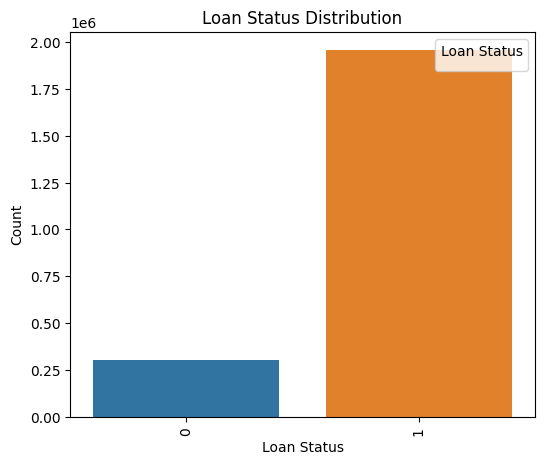

In [44]:
# Bar Plot: Loan Status
plt.figure(figsize=(6, 5))
sns.countplot(x='loan_status', data=new_df)
plt.title('Loan Status Distribution')
plt.ylabel('Count')
plt.xlabel('Loan Status')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=90)
plt.show()

In [42]:
# Saving the cleaned data
new_df.to_csv("/content/drive/MyDrive/datasets/Loan Defaulter/cleaned.csv")

In [2]:
# Loading the cleaned data
new_df = pd.read_csv("/content/drive/MyDrive/datasets/Loan Defaulter/cleaned.csv")

Building a custom label encoder

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
import joblib


In [4]:
class CustomLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.encoders = {}

    def fit(self, X, y=None):
        for column in self.columns:
            encoder = LabelEncoder()
            encoder.fit(X[column])
            self.encoders[column] = encoder
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for column in self.columns:
            X_encoded[column] = self.encoders[column].transform(X[column])
        return X_encoded

    def inverse_transform(self, X):
        X_decoded = X.copy()
        for column in self.columns:
            X_decoded[column] = self.encoders[column].inverse_transform(X[column])
        return X_decoded


In [ ]:
df_droped["loan_status"].unique()

In [5]:
# encoding all columns that are objects
encoder_transformer = CustomLabelEncoder(columns=["term", "grade", "sub_grade", "home_ownership", "verification_status", "purpose", "hardship_flag"])
encoder_transformer.fit(new_df)

# Transform the data using the custom transformer
encoded_df = encoder_transformer.transform(new_df)
# Save the transformer object to a file
joblib.dump(encoder_transformer, "label_encoder_transformer.joblib")

In [6]:
encoded_df

,Unnamed: 0,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,purpose,...,pub_rec,revol_util,total_acc,open_acc,hardship_flag,mort_acc,open_acc_6m,acc_now_delinq,pub_rec_bankruptcies,tax_liens
0,0,3600.0,0,13.99,2,13,1,55000.0,0,2,...,0.0,29.7,13.0,7.0,0,1.0,2.0,0.0,0.0,0.0
1,1,24700.0,0,11.99,2,10,1,65000.0,0,11,...,0.0,19.2,38.0,22.0,0,4.0,1.0,0.0,0.0,0.0
2,2,20000.0,1,10.78,1,8,1,63000.0,0,4,...,0.0,56.2,18.0,6.0,0,5.0,0.0,0.0,0.0,0.0
3,3,35000.0,1,14.85,2,14,1,110000.0,1,2,...,0.0,11.6,17.0,13.0,0,1.0,1.0,0.0,0.0,0.0
4,4,10400.0,1,22.45,5,25,1,104433.0,1,6,...,0.0,64.5,35.0,12.0,0,6.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,2260694,24000.0,1,12.79,2,10,1,95000.0,1,4,...,0.0,84.4,54.0,5.0,0,0.0,2.0,0.0,0.0,0.0
2260664,2260695,24000.0,1,10.49,1,7,1,108000.0,0,2,...,1.0,39.0,58.0,24.0,0,4.0,0.0,0.0,0.0,1.0
2260665,2260696,40000.0,1,10.49,1,7,1,227000.0,2,2,...,0.0,64.9,37.0,5.0,0,3.0,0.0,0.0,0.0,0.0
2260666,2260697,24000.0,1,14.49,2,13,5,110000.0,0,2,...,1.0,68.1,31.0,10.0,0,2.0,0.0,0.0,1.0,0.0


##**Model Training**


In [7]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import learning_curve, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Separate the features (X) and target (y)
X = encoded_df.drop("loan_status", axis=1)
y = encoded_df["loan_status"]

In [10]:
# Split the data into training and testing sets while preserving DataFrame format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1808534, 22)
(1808534,)
(452134, 22)
(452134,)


In [15]:
# Build each model with specific hyperparameters
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
nb_classifier = GaussianNB()
lr_classifier = LogisticRegression(solver='liblinear', C=1.0, penalty='l2', random_state=42)


## Trainining and evaluating each model individually

In [18]:
# MLP Classifier
mlp_model = mlp_classifier.fit(X_train, y_train)
mlp_y_pred = mlp_model.predict(X_test)

mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
mlp_precision = precision_score(y_test, mlp_y_pred)
mlp_recall = recall_score(y_test, mlp_y_pred)
mlp_f1 = f1_score(y_test, mlp_y_pred)
mlp_auc_roc = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])
mlp_cm = confusion_matrix(y_test, mlp_y_pred)

print("MLP Classifier Evaluation:")
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")
print(f"F1-Score: {mlp_f1:.4f}")
print(f"AUC-ROC Score: {mlp_auc_roc:.4f}")
print("Confusion Matrix:")
print(mlp_cm)
print("="*30)



MLP Classifier Evaluation:
Accuracy: 0.8657
Precision: 0.8657
Recall: 1.0000
F1-Score: 0.9280
AUC-ROC Score: 0.5000
Confusion Matrix:
[[     0  60722]
 [     0 391412]]


In [ ]:
# K-Nearest Neighbors Classifier
knn_model = knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)
knn_auc_roc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
knn_cm = confusion_matrix(y_test, knn_y_pred)

print("K-Nearest Neighbors Classifier Evaluation:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print(f"AUC-ROC Score: {knn_auc_roc:.4f}")
print("Confusion Matrix:")
print(knn_cm)
print("="*30)



K-Nearest Neighbors Classifier Evaluation:
Accuracy: 0.8470
Precision: 0.8680
Recall: 0.9709
F1-Score: 0.9166
AUC-ROC Score: 0.5651
Confusion Matrix:
[[  2918  57804]
 [ 11382 380030]]


In [ ]:

# Logistic Regression Classifier
lr_model = lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)
lr_auc_roc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
lr_cm = confusion_matrix(y_test, lr_y_pred)

print("Logistic Regression Classifier Evaluation:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print(f"AUC-ROC Score: {lr_auc_roc:.4f}")
print("Confusion Matrix:")
print(lr_cm)
print("="*30)

Logistic Regression Classifier Evaluation:
Accuracy: 0.8657
Precision: 0.8657
Recall: 1.0000
F1-Score: 0.9280
AUC-ROC Score: 0.5493
Confusion Matrix:
[[     0  60722]
 [     0 391412]]


In [19]:
# Random Forest Classifier
rf_model = rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_auc_roc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_cm = confusion_matrix(y_test, rf_y_pred)

print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"AUC-ROC Score: {rf_auc_roc:.4f}")
print("Confusion Matrix:")
print(rf_cm)
print("="*30)


Random Forest Classifier Evaluation:
Accuracy: 0.8661
Precision: 0.8662
Recall: 0.9998
F1-Score: 0.9282
AUC-ROC Score: 0.7179
Confusion Matrix:
[[   256  60466]
 [    71 391341]]


In [ ]:
# Naive Bayes Classifier
nb_model = nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1 = f1_score(y_test, nb_y_pred)
nb_auc_roc = roc_auc_score(y_test, nb_model.predict_proba(X_test)[:, 1])
nb_cm = confusion_matrix(y_test, nb_y_pred)

print("Naive Bayes Classifier Evaluation:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1-Score: {nb_f1:.4f}")
print(f"AUC-ROC Score: {nb_auc_roc:.4f}")
print("Confusion Matrix:")
print(nb_cm)
print("="*30)


Naive Bayes Classifier Evaluation:
Accuracy: 0.8657
Precision: 0.8657
Recall: 1.0000
F1-Score: 0.9280
AUC-ROC Score: 0.6351
Confusion Matrix:
[[     0  60722]
 [     0 391412]]


###**Model Exporting**

Both Random Forest and MLP classifiers have similar accuracy and F1-Score values, but there are notable differences in their recall and AUC-ROC Score.

Reasoning for Selection:

1.   Random Forest Classifier: The Random Forest Classifier shows excellent performance with high recall (0.9998), indicating that it correctly identifies most of the positive samples (loan defaults). It also has a relatively high AUC-ROC Score (0.7179), indicating good discrimination between positive and negative samples

2.   MLP Classifier: The MLP Classifier also exhibits strong performance with perfect recall (1.0000), indicating that it correctly classifies all positive samples. However, it has a low AUC-ROC Score (0.5000), suggesting that it struggles to distinguish between positive and negative samples.


    

In [20]:
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']

In [21]:
joblib.dump(mlp_model, "mlp_model.pkl")

['mlp_model.pkl']